In [21]:
import pandas as pd
df = pd.read_csv('/users/lakshmipriyanka/downloads/Linear Regression/BlackFriday.csv')

In [22]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Years_of_Stay,Marital_Status,PC_1,PC_2,PC_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [23]:
df.isna().any()

User_ID           False
Product_ID        False
Gender            False
Age               False
Occupation        False
City_Category     False
Years_of_Stay     False
Marital_Status    False
PC_1              False
PC_2               True
PC_3               True
Purchase          False
dtype: bool

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
df.fillna(value=0,inplace=True)
df["PC_2"] = df["PC_2"].astype(int)
df["PC_3"] = df["PC_3"].astype(int)
print('PC_2', df['PC_2'].unique())
print('PC_3', df['PC_3'].unique())

PC_2 [ 0  6 14  2  8 15 16 11  5  3  4 12  9 10 17 13  7 18]
PC_3 [ 0 14 17  5  4 16 15  8  9 13  6 12  3 18 11 10]


In [26]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

In [27]:
df['Age'] = LE.fit_transform(df['Age'])

In [28]:
df['Gender'] = df['Gender'].replace('M', 0)
df['Gender'] = df['Gender'].replace('F', 1)

In [29]:
df['City_Category'] = df['City_Category'].replace('A', 0)
df['City_Category'] = df['City_Category'].replace('B', 1)
df['City_Category'] = df['City_Category'].replace('C', 2)

In [30]:
df['Years_of_Stay'] = LE.fit_transform(df['Years_of_Stay'])
df['Product_ID'] = LE.fit_transform(df['Product_ID'])

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
User_ID           537577 non-null int64
Product_ID        537577 non-null int64
Gender            537577 non-null int64
Age               537577 non-null int64
Occupation        537577 non-null int64
City_Category     537577 non-null int64
Years_of_Stay     537577 non-null int64
Marital_Status    537577 non-null int64
PC_1              537577 non-null int64
PC_2              537577 non-null int64
PC_3              537577 non-null int64
Purchase          537577 non-null int64
dtypes: int64(12)
memory usage: 49.2 MB


In [32]:
from sklearn.model_selection import train_test_split
x = df.drop(['User_ID','Product_ID','Purchase'],axis=1)
y = df['Purchase']

In [33]:
from sklearn import linear_model
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state = 42)
print('Training Features Shape ', x_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', x_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape  (430061, 9)
Training Labels Shape: (430061,)
Testing Features Shape: (107516, 9)
Testing Labels Shape: (107516,)


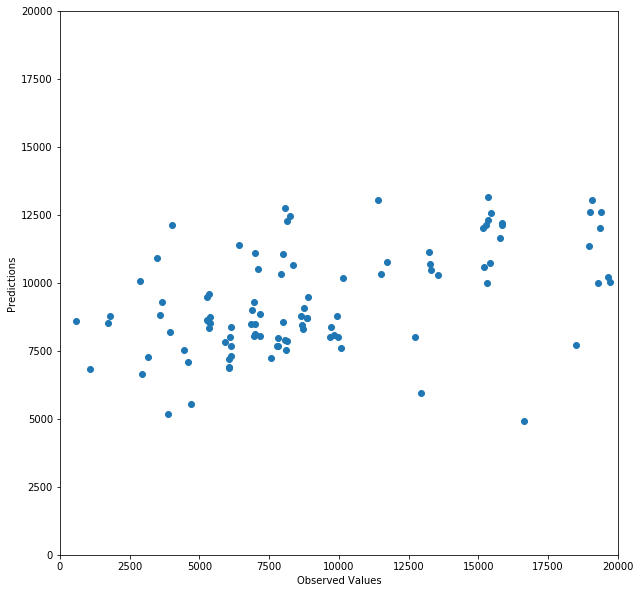

In [43]:
lm = linear_model.LinearRegression()
model=lm.fit(x_train,y_train)
predictions_linear_regression=lm.predict(x_test)
from matplotlib import pyplot as plt
plt.figure(figsize=(10, 10))
plt.scatter(y_test[0:100], predictions_linear_regression[0:100])
plt.xlabel('Observed Values')
plt.ylabel('Predictions')
plt.xlim(0,20000)
plt.ylim(0,20000)
plt.show()

In [35]:
score=model.score(x_test, y_test)
score

0.134217726800279

In [36]:
import numpy as np
from sklearn import metrics
rmse_linear_regression=np.sqrt(metrics.mean_squared_error(y_test, predictions_linear_regression))
rmse_linear_regression

4636.865098682143

In [37]:
errors = abs(predictions_linear_regression - y_test)
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 31.78 %.


In [51]:
x_test[0:10]

,Gender,Age,Occupation,City_Category,Years_of_Stay,Marital_Status,PC_1,PC_2,PC_3
287383,0,2,17,2,3,0,1,2,15
130087,0,2,14,0,3,0,1,16,0
104368,0,4,0,0,1,1,8,0,0
370791,1,2,4,2,1,0,8,16,0
121991,1,2,0,1,3,0,5,14,0
225339,1,1,0,2,0,1,5,0,0
243345,0,2,17,0,2,0,5,0,0
130823,0,3,14,2,3,0,1,16,0
427396,0,2,1,0,1,1,16,0,0
363068,0,3,0,1,3,1,11,15,0


In [52]:
y_test[0:10]

287383     8058
130087    19297
104368     6121
370791     8130
121991     8676
225339     6863
243345     5300
130823    11726
427396    16620
363068     4586
Name: Purchase, dtype: int64

In [53]:
predictions_linear_regression[0:10].tolist()

[12775.245845242694,
 9998.626309876985,
 7684.663042329473,
 7861.859546243601,
 8471.795268346816,
 8502.475584639855,
 8592.074285982422,
 10765.990309294346,
 4920.21090652386,
 7095.257779859752]

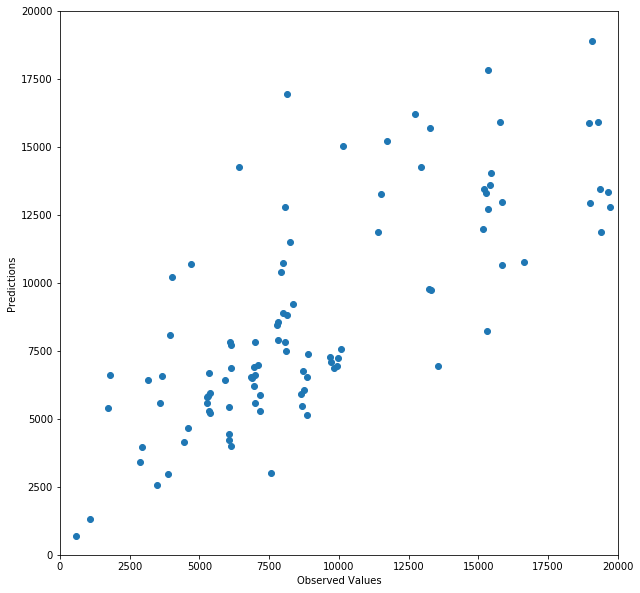

In [42]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10)  
model_random_forest=regressor.fit(x_train, y_train)  
predictions_random_forest = regressor.predict(x_test)
plt.figure(figsize=(10, 10))
plt.scatter(y_test[0:100], predictions_random_forest[0:100])
plt.xlabel('Observed Values')
plt.ylabel('Predictions')
plt.xlim(0, 20000)
plt.ylim(0, 20000)
plt.show()

In [42]:
score_random_forest=model_random_forest.score(x_test,y_test)

In [43]:
score_random_forest

0.6226957743224464

In [44]:
rmse_random_forest=np.sqrt(metrics.mean_squared_error(y_test, predictions_random_forest))

In [45]:
rmse_random_forest

3100.3355014866684

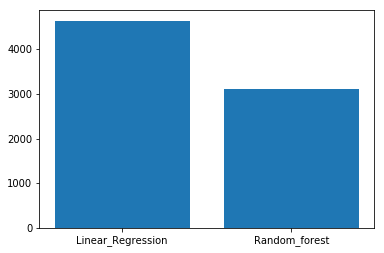

In [46]:
rmse=[rmse_linear_regression,rmse_random_forest]
names=['Linear_Regression','Random_forest']
plt.ylim =(2000,6000)
plt.bar(names,rmse)
plt.show()

In [61]:
x_test[95:100]

,Gender,Age,Occupation,City_Category,Years_of_Stay,Marital_Status,PC_1,PC_2,PC_3
27249,0,5,18,1,1,1,11,0,0
307066,0,2,2,0,1,1,2,4,5
199723,0,1,0,2,0,0,15,16,0
471914,0,4,3,0,0,1,5,6,0
460670,0,5,17,1,1,1,5,14,0


In [62]:
y_test[95:100]

27249      3155
307066    10154
199723    12930
471914     8843
460670     6946
Name: Purchase, dtype: int64

In [63]:
predictions_random_forest[95:100].tolist()

[6428.522666666666,
 15036.2,
 14284.216666666665,
 5160.527619047619,
 6910.453333333333]

In [57]:
errors = abs(predictions_random_forest - y_test)
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 66.89 %.
